Sensibilidad de los resultados a la selección de datos
===

* *15 min* | Ultima modificación: Marzo 19, 2020

En el tutorial sobre aprendizaje y memorización, se usó un polinomio de grado $N$ para aproximar el siguiente conjunto de datos, cuya gráfica se presenta a continuación.

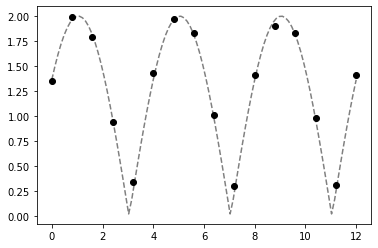

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(12345)


def f(x):
    y = [2 * abs(math.sin(e * math.pi / 4 + 0.75)) for e in x]
    return np.array(y)


x_real = np.linspace(start=0, stop=12, num=100)
x_data = np.linspace(start=0, stop=12, num=16)

d_real = f(x_real)
d_data = f(x_data) + np.random.normal(0, 0.05, len(x_data))

plt.plot(x_real, d_real, "--", color="gray")
plt.plot(x_data, d_data, "o", color="black")
plt.show()

En ese mismo tutorial se discutió el dilema sesgo-varianza, el cual indica que mientras más ajuste el modelo  a los datos de entrenamiento (sesgo), se dan resultados más volátiles cuando se presentan nuevos datos a dicho modelo.

En el siguiente fragmento de código, se seleccionan aleatoriamente 13 datos para entrenamiento del modelo. Los tres datos restantes serían usados para evaluar la generalización del modelo. En la figura de abajo, se grafica el polinomio estimado para cada conjunto de datos.

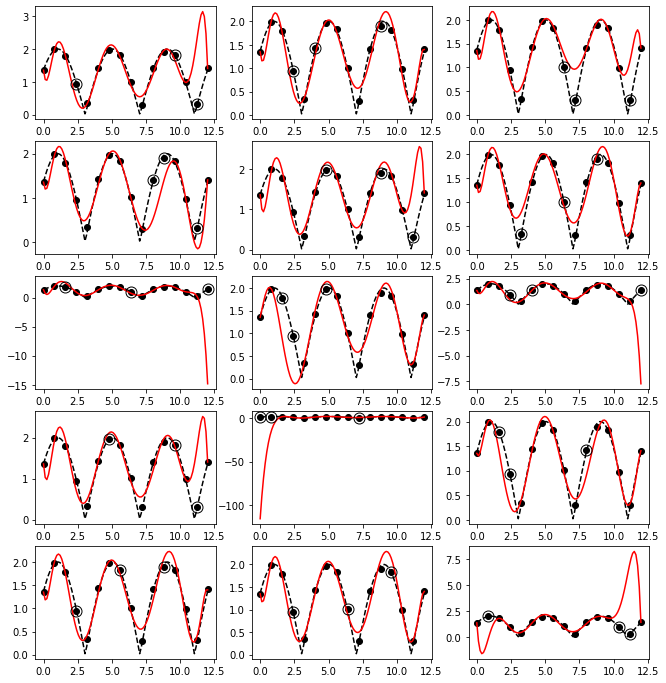

In [2]:
#
# Los datos disponibles se dividen en dos conjuntos:
# x_fit, y_fit: para estimar el modelo
# x_test, y_test: para evaluar la generalización
#
# Se usaran 13 datos para estimar el modelo
# y los 3 restantes para evaluarlo.
# Los conjuntos son escogidos aleatoriamente
#

# orden del modelo
n = 9

plt.figure(figsize=(11, 12))
i = 1
sse_fit = []
sse_test = []

for k in range(15):

    index = np.random.choice(16, 13, replace=False)

    x_fit = x_data[index]
    d_fit = d_data[index]

    x_test = np.delete(x_data, index)
    d_test = np.delete(d_data, index)

    w = np.polyfit(x_fit, d_fit, n)
    m = np.poly1d(w)

    y_fit = m(x_fit)
    y_test = m(x_test)
    y_real = m(x_real)

    sse_fit.append(sum((d_fit - y_fit) ** 2))
    sse_test.append(sum((d_test - y_test) ** 2))

    plt.subplot(5, 3, i)
    i += 1
    plt.plot(x_data, d_data, "o", color="black")
    plt.plot(x_real, d_real, "--", color="black")
    plt.plot(x_real, y_real, color="red")
    plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.show()

Como se puede observar, los resultados difieren notoriamente y dependen de los datos usados para la estimación de los coeficientes del modelo.

Lo anterior implica que el modelo óptimo debe seleccionarse usando técnicas que sean robustas ante la variabilidad en la selección del conjunto de datos.